# Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


# Load dataset
df = pd.read_csv("house_data.csv")

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

KeyboardInterrupt: 

## Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
display("\nMissing Values:")
display(df.isnull().sum())


'\nMissing Values:'

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price']

Categorical Features:
[]


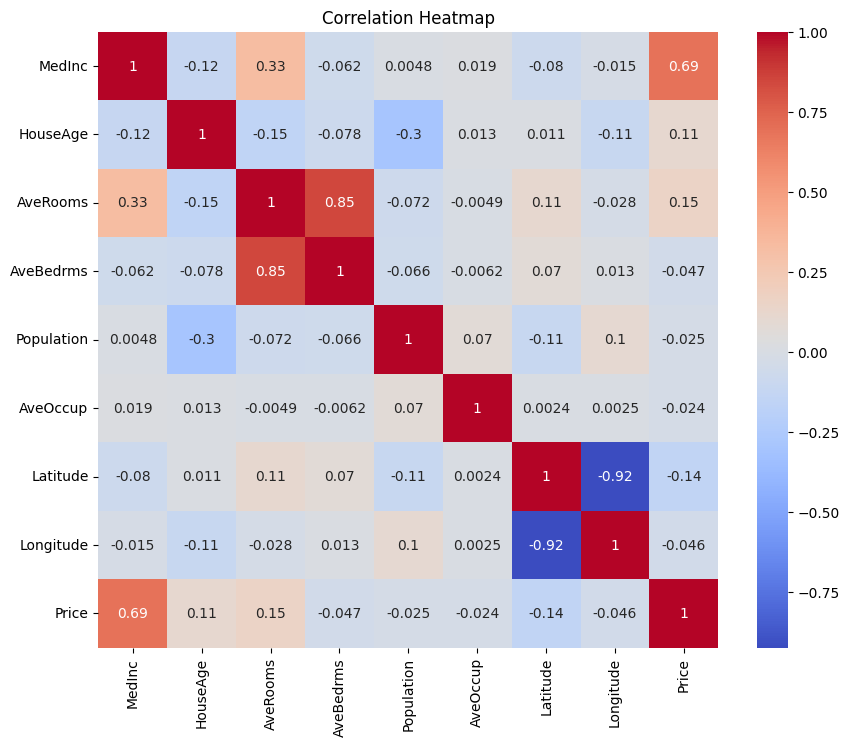

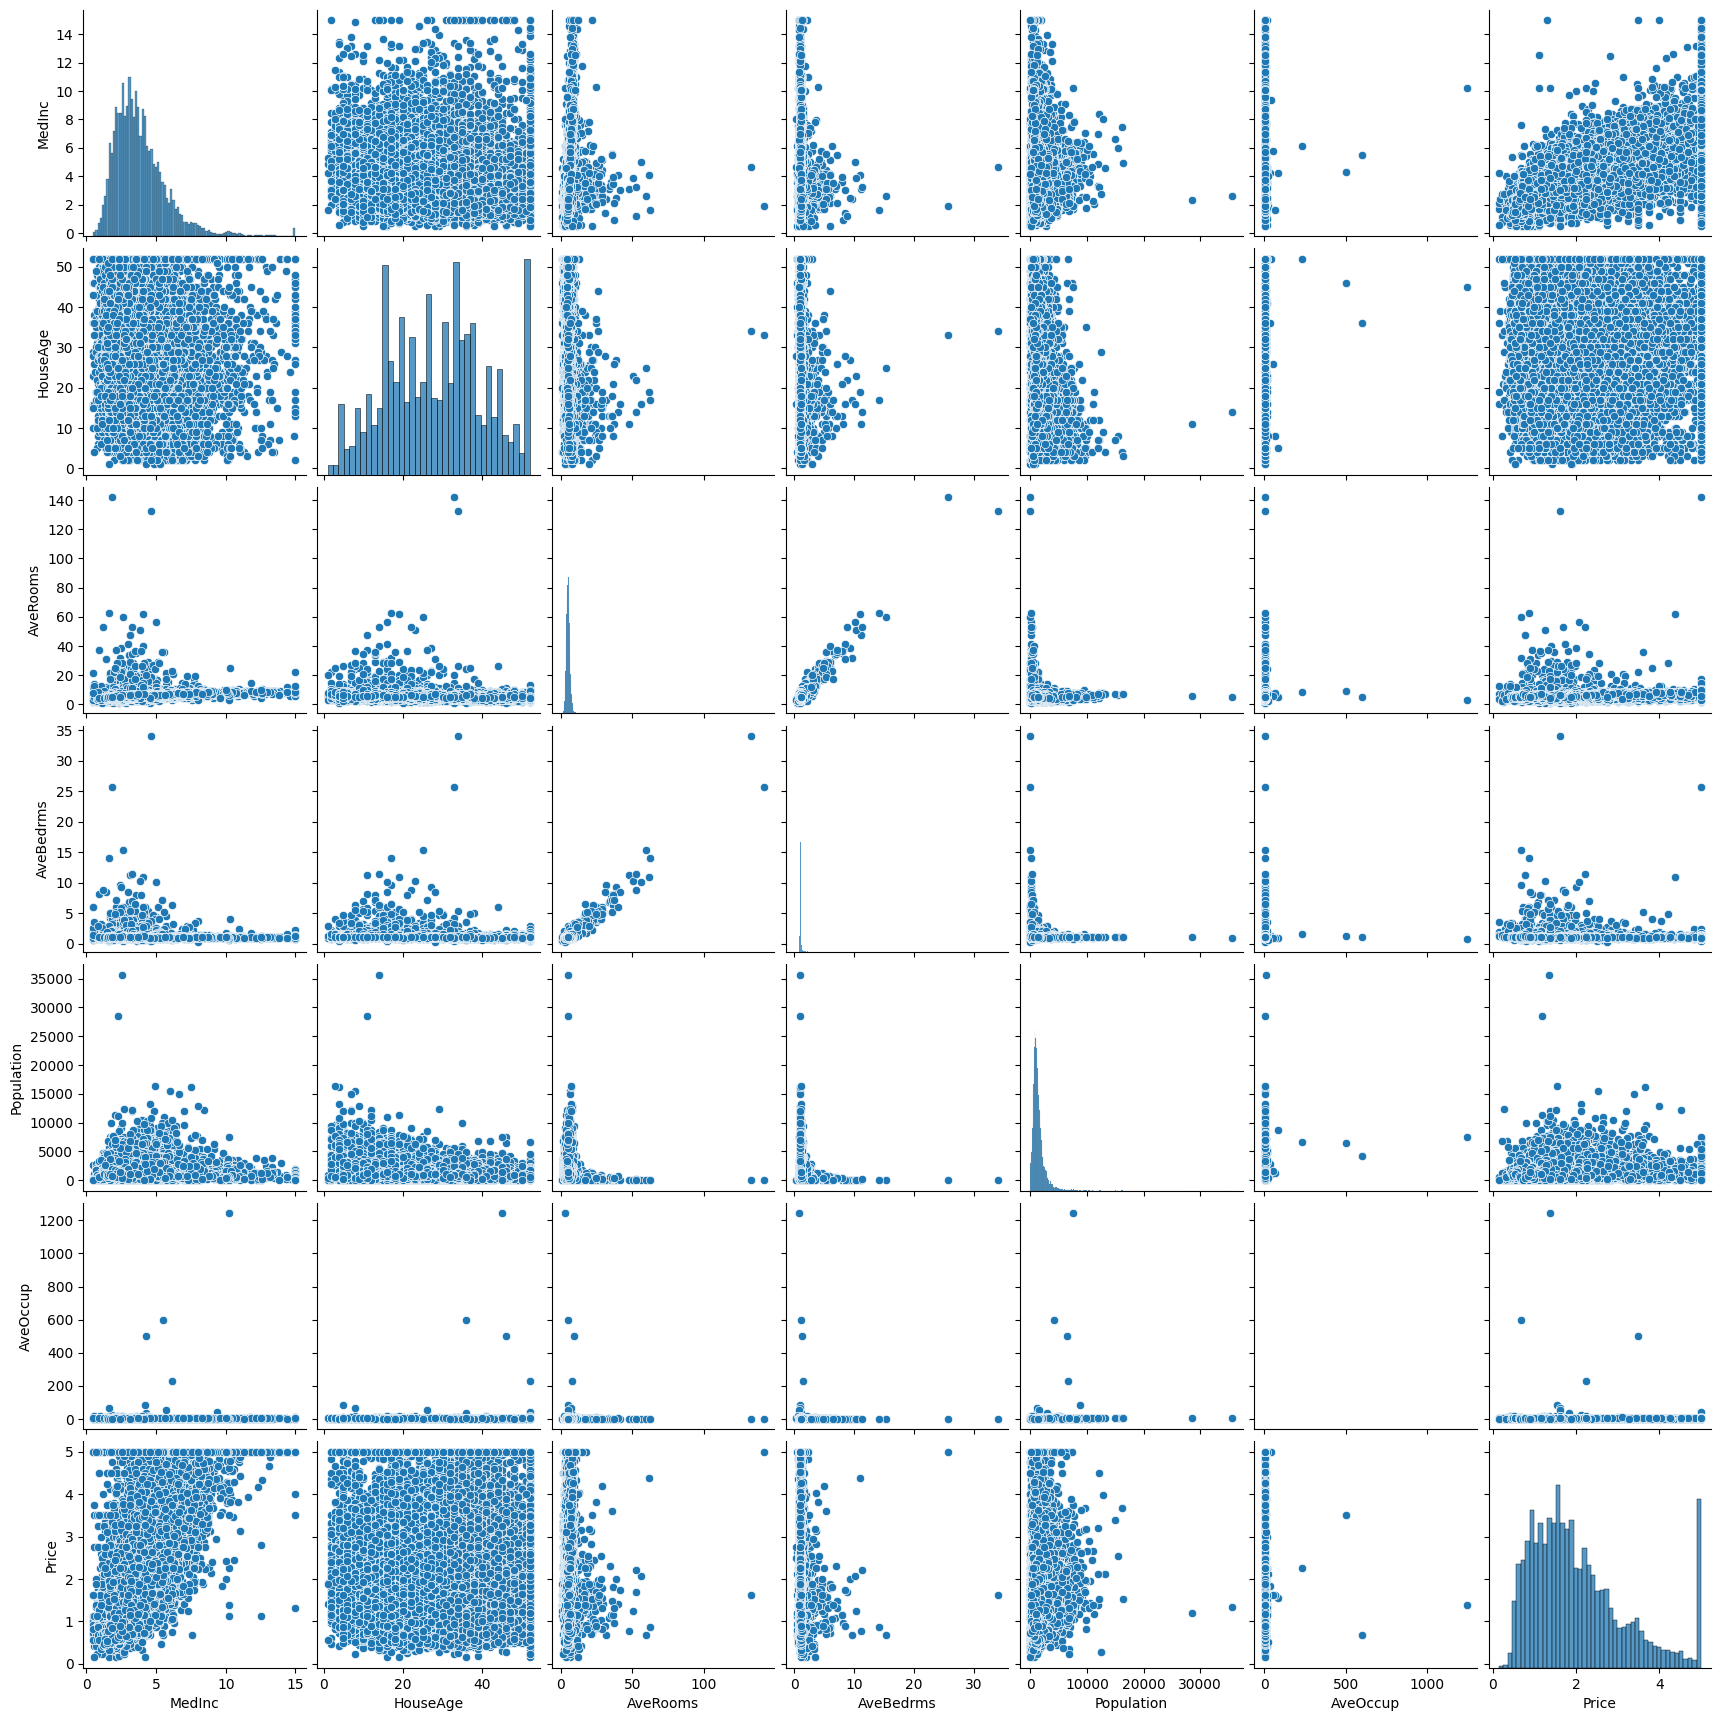

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.pairplot(df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Price"]])
plt.show()

# Step 2: Train a Basic Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop("Price", axis=1)
y = df["Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.5558915986952443
MAE: 0.5332001304956558
R2 Score: 0.5757877060324508


# Step 3.1: Feature Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_scaled = lr.predict(X_test_scaled)
print("R2 after standardization:", r2_score(y_test, y_pred_scaled))

R2 after standardization: 0.575787706032451


# Step 3.2: Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial R2:", r2_score(y_test, y_pred_poly))

Polynomial R2: 0.6456819713970207


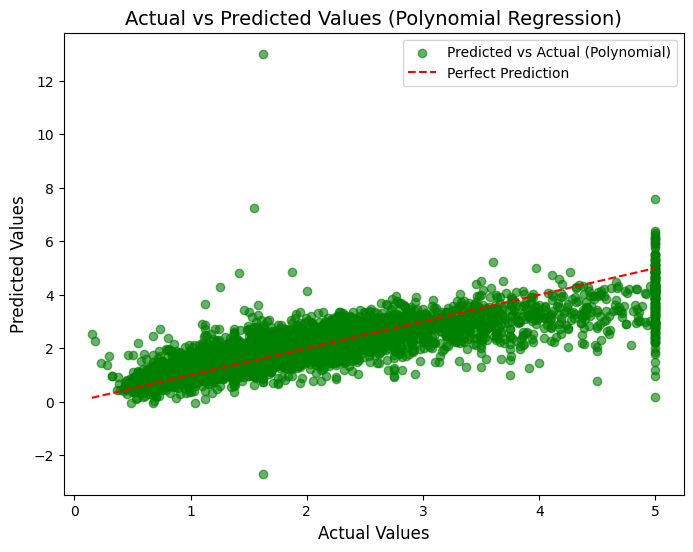

In [ ]:
# Plotting Actual vs Predicted values for the Polynomial Model
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6, label='Predicted vs Actual (Polynomial)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Values (Polynomial Regression)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()

# Step 3.3: Regularization

Ridge R2: 0.5758185345441323
Lasso R2: 0.4814202815313765


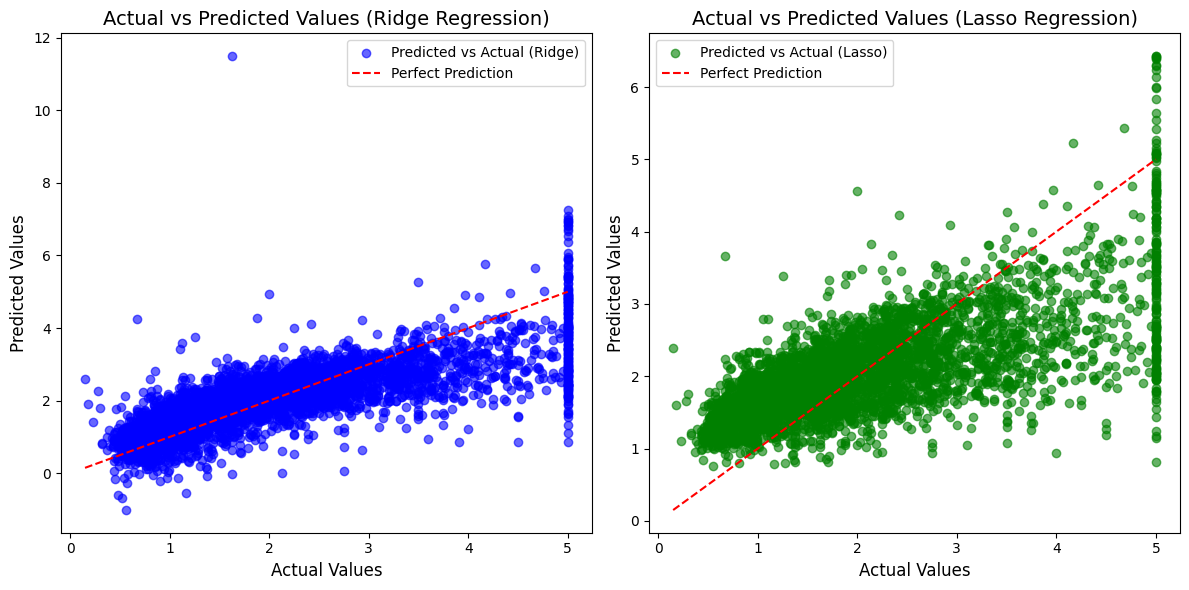

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Ridge R2:", ridge_r2)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("Lasso R2:", lasso_r2)

# Plotting Actual vs Predicted values for Ridge and Lasso models
plt.figure(figsize=(12,6))

# Ridge Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label='Predicted vs Actual (Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Values (Ridge Regression)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()

# Lasso Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Predicted vs Actual (Lasso)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Values (Lasso Regression)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


# Step 3.4: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Performing GridSearchCV with Ridge regression
gs_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
gs_ridge.fit(X_train_scaled, y_train)

# Output the best alpha and best score
print("Best Ridge Alpha:", gs_ridge.best_params_)
print("Best Ridge R2 (Cross-validated):", gs_ridge.best_score_)

Best Ridge Alpha: {'alpha': 0.1}
Best Ridge R2 (Cross-validated): 0.6114840058334444


Best Ridge Alpha: {'alpha': 0.1}
Best Ridge R2 (Cross-validated): 0.6114840058334444
Best Ridge R2 on Test Set: 0.5757907979394906


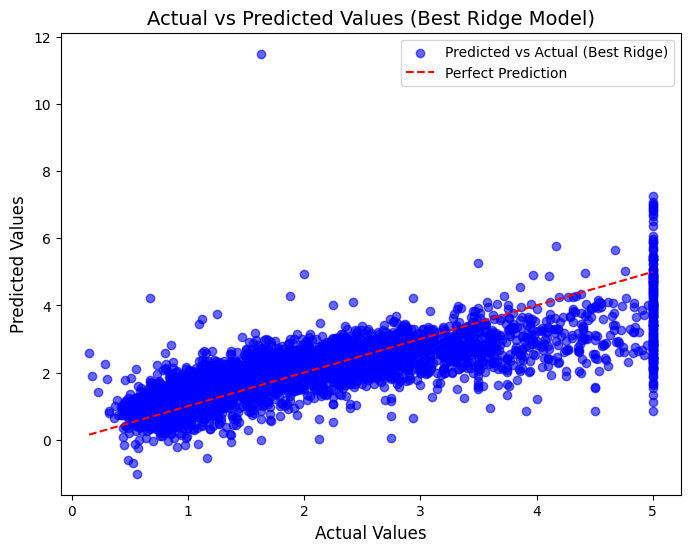

In [ ]:
# Using the best model found by GridSearchCV
best_ridge_model = gs_ridge.best_estimator_

# Making predictions on the test set using the best model
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

# Calculating the R2 score on the test set
best_ridge_r2 = r2_score(y_test, y_pred_best_ridge)
print("Best Ridge R2 on Test Set:", best_ridge_r2)

# Plotting Actual vs Predicted values for the best Ridge model
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best_ridge, color='blue', alpha=0.6, label='Predicted vs Actual (Best Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Values (Best Ridge Model)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()


# Step 4: Compare and Evaluate Model Performance

In [ ]:
models = {
    "Linear": y_pred,
    "Standardized Linear": y_pred_scaled,
    "Polynomial": y_pred_poly,
    "Ridge": ridge.predict(X_test_scaled),
    "Lasso": lasso.predict(X_test_scaled)
}

for name, preds in models.items():
    print(f"{name} Model -> MSE: {mean_squared_error(y_test, preds):.4f}, R2: {r2_score(y_test, preds):.4f}")

Linear Model -> MSE: 0.5559, R2: 0.5758
Standardized Linear Model -> MSE: 0.5559, R2: 0.5758
Polynomial Model -> MSE: 0.4643, R2: 0.6457
Ridge Model -> MSE: 0.5559, R2: 0.5758
Lasso Model -> MSE: 0.6796, R2: 0.4814


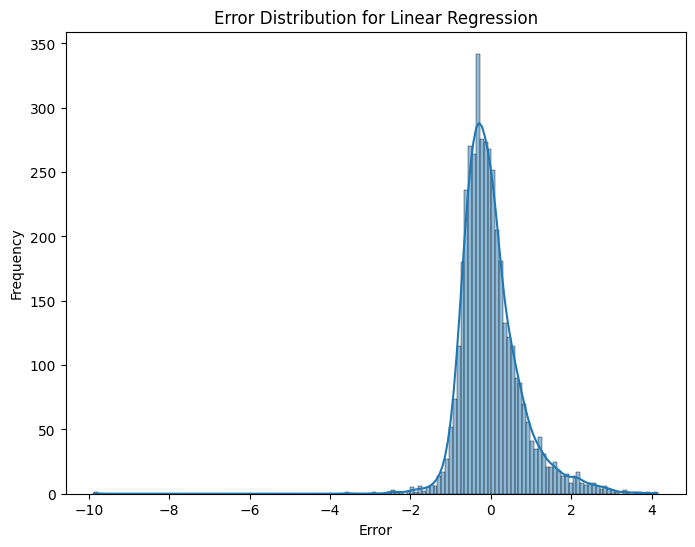

In [ ]:
# Error distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title("Error Distribution for Linear Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Step 5: Prediction and Analysis

In this step, we'll make predictions using the best model and analyze the results. We'll visualize actual vs predicted prices and explore how well the model performs.

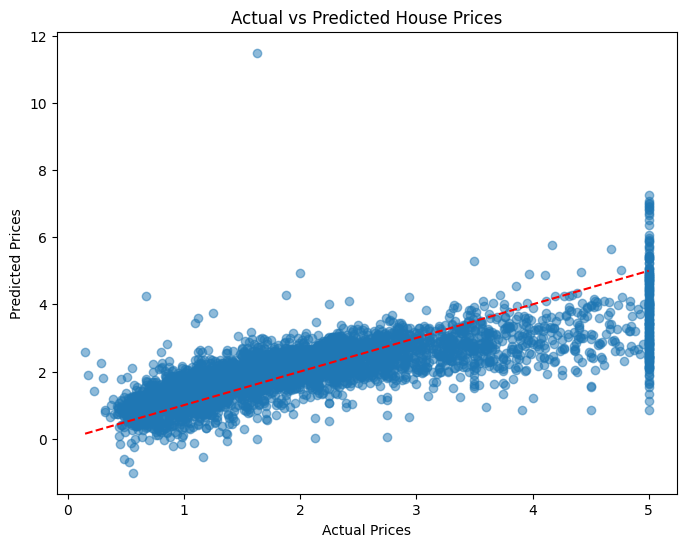

In [ ]:
# Using Ridge model as best (or replace with best model based on earlier evaluation)
y_best_pred = ridge.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# Importing necessary libraries
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Train Ridge Regression Model (with best alpha from GridSearchCV)
ridge_best_model = gs_ridge.best_estimator_
y_pred_ridge_best = ridge_best_model.predict(X_test_scaled)

# Train Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Train Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


In [ ]:
# Collect predictions and calculate MSE and R² for each model
models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression (Best)": y_pred_ridge_best,
    "Lasso Regression": y_pred_lasso,
    "Polynomial Regression": y_pred_poly
}

# Calculate Mean Squared Error (MSE)
mse_scores = {model_name: mean_squared_error(y_test, y_pred) for model_name, y_pred in models.items()}

# Calculate R² Score
r2_scores = {model_name: r2_score(y_test, y_pred) for model_name, y_pred in models.items()}

# Displaying MSE and R² Scores
print("MSE Scores:")
print(mse_scores)
print("\nR² Scores:")
print(r2_scores)


MSE Scores:
{'Linear Regression': 0.5558915986952442, 'Ridge Regression (Best)': 0.5558875470324994, 'Lasso Regression': 0.6795515190149223, 'Polynomial Regression': 0.46430152583396}

R² Scores:
{'Linear Regression': 0.575787706032451, 'Ridge Regression (Best)': 0.5757907979394906, 'Lasso Regression': 0.4814202815313765, 'Polynomial Regression': 0.6456819713970207}


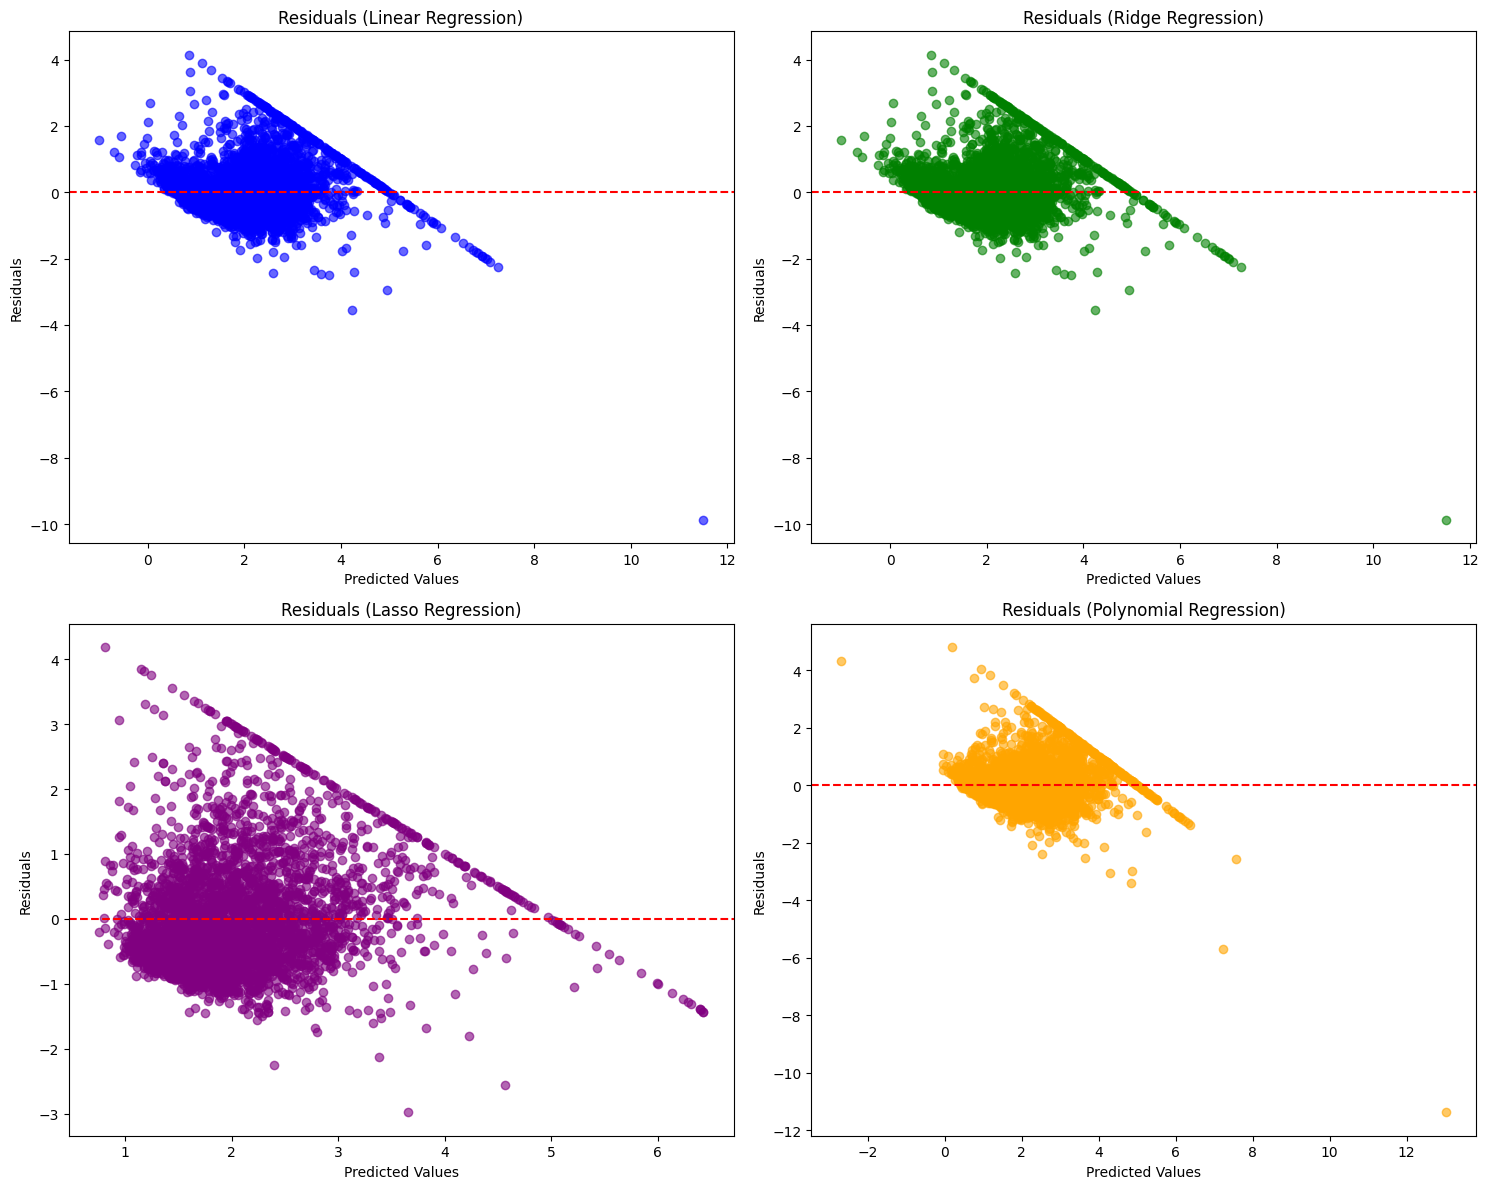

In [ ]:
import matplotlib.pyplot as plt

# Residual Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residuals for Linear Regression
axes[0, 0].scatter(y_pred_lr, y_test - y_pred_lr, color='blue', alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title("Residuals (Linear Regression)")
axes[0, 0].set_xlabel("Predicted Values")
axes[0, 0].set_ylabel("Residuals")

# Residuals for Ridge Regression
axes[0, 1].scatter(y_pred_ridge_best, y_test - y_pred_ridge_best, color='green', alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_title("Residuals (Ridge Regression)")
axes[0, 1].set_xlabel("Predicted Values")
axes[0, 1].set_ylabel("Residuals")

# Residuals for Lasso Regression
axes[1, 0].scatter(y_pred_lasso, y_test - y_pred_lasso, color='purple', alpha=0.6)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_title("Residuals (Lasso Regression)")
axes[1, 0].set_xlabel("Predicted Values")
axes[1, 0].set_ylabel("Residuals")

# Residuals for Polynomial Regression
axes[1, 1].scatter(y_pred_poly, y_test - y_pred_poly, color='orange', alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title("Residuals (Polynomial Regression)")
axes[1, 1].set_xlabel("Predicted Values")
axes[1, 1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


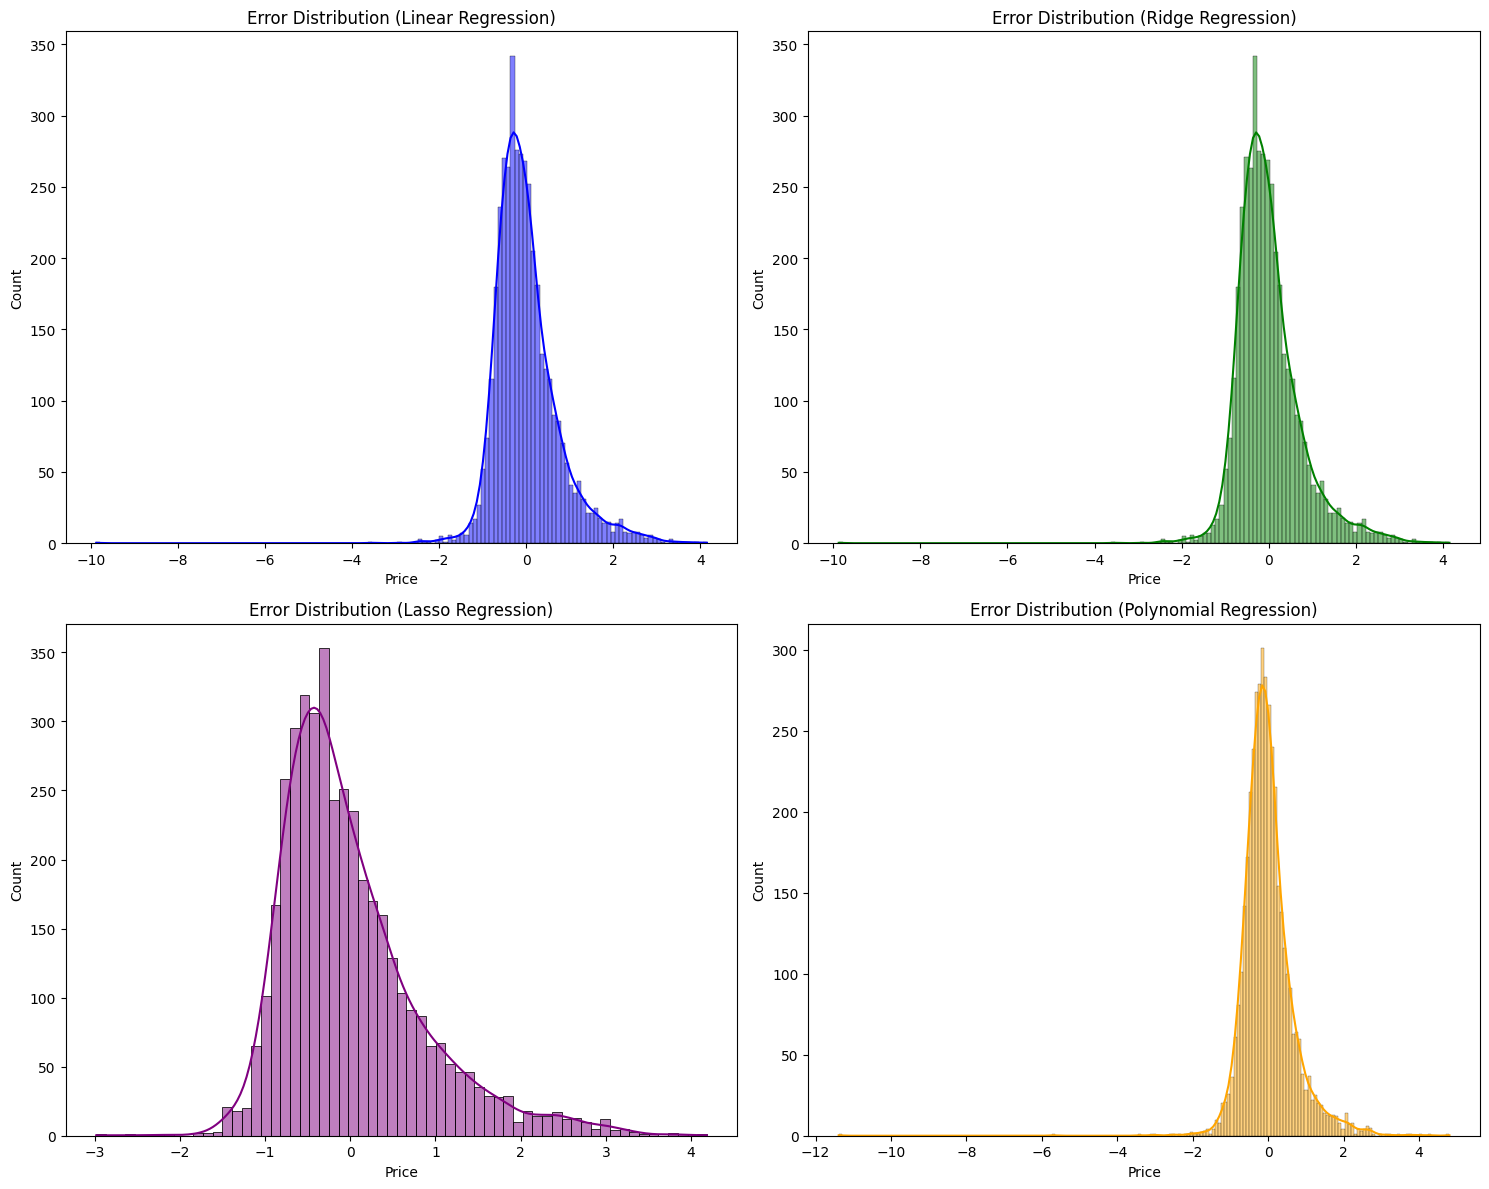

In [ ]:
# Error Distribution Plot for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Error Distribution for Linear Regression
sns.histplot(y_test - y_pred_lr, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Error Distribution (Linear Regression)")

# Error Distribution for Ridge Regression
sns.histplot(y_test - y_pred_ridge_best, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title("Error Distribution (Ridge Regression)")

# Error Distribution for Lasso Regression
sns.histplot(y_test - y_pred_lasso, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title("Error Distribution (Lasso Regression)")

# Error Distribution for Polynomial Regression
sns.histplot(y_test - y_pred_poly, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title("Error Distribution (Polynomial Regression)")

plt.tight_layout()
plt.show()

# Conclusion

- Polynomial Regression performs the best with the lowest MSE (0.4643) and the highest R² score (0.6457), indicating the best fit to the data.
- Linear Regression and Ridge Regression show similar performance with MSEs around 0.5559 and R² scores of approximately 0.5758.
- Lasso Regression has the highest MSE (0.6796) and the lowest R² score (0.4814), indicating poor performance, likely due to over-regularization.
- To sum it up, polynomial regression is the best model based on MSE and R², providing the most accurate and reliable predictions.

In [ ]:
# Predicting prices on the training set using the Polynomial Regression model
y_pred_train_poly = poly_model.predict(X_train_poly)

# Display actual vs predicted prices for Polynomial Regression on training data
comparison_train_df = pd.DataFrame({
    'Actual Price': y_train,
    'Predicted Price': y_pred_train_poly
})

# Display the first 10 rows for a quick comparison
print(comparison_train_df.head(10))


       Actual Price  Predicted Price
14196       1.03000         1.729328
8267        3.82100         3.045314
17445       1.72600         2.672346
14265       0.93400         1.257771
2271        0.96500         1.467872
17848       2.64800         3.248625
6252        1.57300         1.357878
9389        5.00001         4.205277
6113        1.39800         0.995272
6061        3.15600         2.679219


In [ ]:
# Predicting prices on the training set using the Linear Regression model
y_pred_train_lr = lr.predict(X_train_scaled)

# Display actual vs predicted prices for Linear Regression on training data
comparison_train_lr_df = pd.DataFrame({
    'Actual Price': y_train,
    'Predicted Price': y_pred_train_lr
})

# Display the first 10 rows for a quick comparison
print(comparison_train_lr_df.head(10))


       Actual Price  Predicted Price
14196       1.03000         1.937258
8267        3.82100         2.489106
17445       1.72600         2.647355
14265       0.93400         1.565895
2271        0.96500         1.613128
17848       2.64800         3.283596
6252        1.57300         1.544837
9389        5.00001         4.139530
6113        1.39800         0.843304
6061        3.15600         2.659941


Linear Regression

- Predictions are somewhat accurate but often off, especially for higher values (e.g., actual price 14196 predicted as 1.9373).
- It struggles to capture non-linear relationships, resulting in less accurate predictions overall.

Polynomial Regression

- Performs slightly better, with predictions closer to actual values (e.g., actual price 14196 predicted as 1.7293).
- More effective for capturing non-linear relationships in the data.

# Save as HTML

In [4]:
from nbconvert import HTMLExporter
import nbformat

# Load your notebook file (.ipynb)
notebook_filename = r'C:\Users\Anjel\Downloads\Castillo_ML4.ipynb'
with open(notebook_filename) as f:
    notebook_content = nbformat.read(f, as_version=4)

# Initialize the HTML exporter
html_exporter = HTMLExporter()

# Export the notebook to HTML
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Save the exported HTML to a file
html_filename = r'C:\Users\Anjel\Downloads\Castillo_ML4.html'
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f'Notebook saved as {html_filename}')


Notebook saved as C:\Users\Anjel\Downloads\Castillo_ML4.html
